# Tech Challenger - Fase 01 - Etapa 01 - Análise e Preparação dos Dados

**Problema:**
Você é um(a) profissional encarregado(a) de desenvolver um modelo
preditivo de regressão para prever o valor dos custos médicos individuais
cobrados pelo seguro de saúde.


## Análise Estatistica e Visualização dos Dados

Nesta parte, iremos carregar um conjunto de dados que foi colhido do site kaggle.
O Conjunto em questão está em: [Medical Cost Personal Datasets](https://www.kaggle.com/datasets/mirichoi0218/insurance/data)

Nosso objetivo é analisar o formato dos dados e começar a limpeza e exploração de perguntas a cerca do que podemos aprender com eles.

Algumas perguntas pensadas pela equipe a cerca dos dados:
* Existem diferenças nos custos médios entre as **regiões**? 
* **Fumantes** têm custos médicos mais altos ou mais baixos?
* O **sexo** tem influencia nos custos médicos?
* O **IMC**, campo BMI nos dados, influencia os custos?
* Qual a relação entre os custos com a **idade**?
* Ter ou não **filhos** influencia em algo?
* Quais das variáveis têm efeito maior nos custos médicos? (pergunta respondida após o processamentos dos dados)

### Visualização dos Dados

* O conjunto de dados contém 1338 entradas e 7 colunas.
* As colunas são: 'age' (idade), 'sex' (sexo), 'bmi' (IMC), 'children' (quantidade de filhos), 'smoker' (fumante ou não), 'region' (região que reside), e 'charges' (custos médicos).
* Não há valores ausentes em nenhuma das colunas, o que significa que o conjunto de dados está completo. Não vamos precisar fazer preenchimento com as medianas.
* Variáveis categóricas (vamos precisar tratar para colocar no modelo): 'sex', 'smoker' e 'region'
* Variáveis numéricas: 
    - 'age' e 'children' são inteiros.
    - 'bmi' e 'charges' são floats.
* A Variável Dependente do conjunto de dados parece ser a coluna: 'charges', representando os custos médicos.

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("dados/insurance.csv")
print("- Descrição do Conjunto de Dados:")
data.info()

- Descrição do Conjunto de Dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [71]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [72]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Análise dos Dados

**Pergunta 01:** Existem diferenças nos custos médios entre as regiões? 

**Gráfico:** Boxplot das colunas region vs. charges.

**Comentário:** Não há diferenças significativas nos custos entre as regiões. As medianas dos custos são bastante próximas, indicando que a localização geográfica não é um fator determinante para os custos médicos.

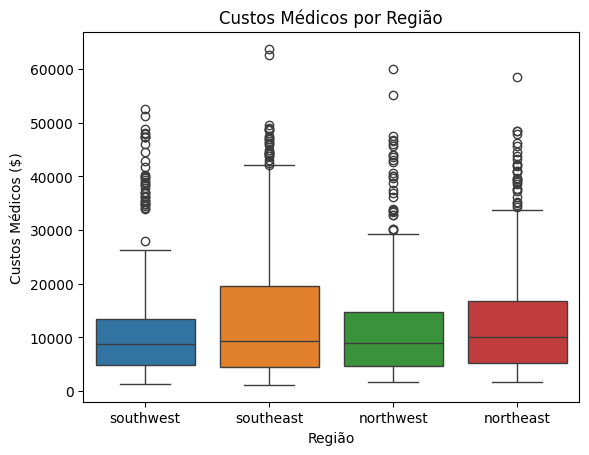

In [73]:
sns.boxplot(x='region', y='charges', data=data, hue="region")
plt.title('Custos Médicos por Região')
plt.xlabel('Região')
plt.ylabel('Custos Médicos ($)')
plt.show()

**Pergunta 02:** Fumantes têm custos médicos mais altos ou mais baixos?

**Gráfico:** Boxplot das colunas smoker vs. charges

**Comentário:** Fumantes têm custos médicos significativamente mais altos em comparação com não fumantes, com isso sabemos que o hábito de fumar é um dos principais fatores que influenciam nos custos.

Distribuição da População por Hábito de Fumar
smoker
no     1064
yes     274
Name: count, dtype: int64


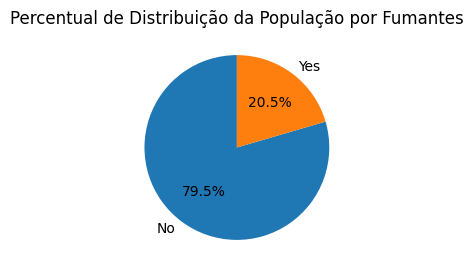

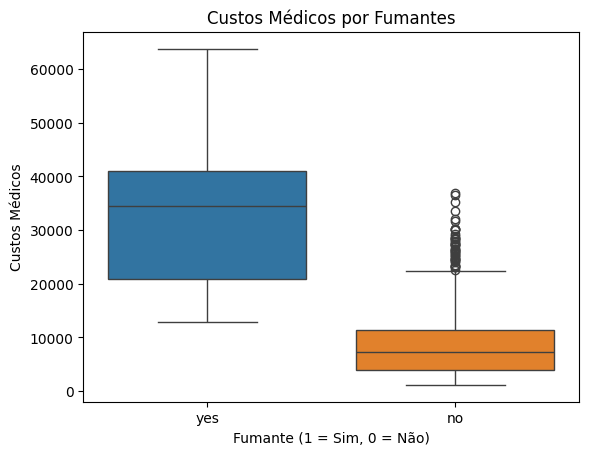

In [74]:
smoker_counts = data['smoker'].value_counts()
print(f"Distribuição da População por Hábito de Fumar\n{smoker_counts}")

labels_sex = [label.title() for label in smoker_counts.index]
plt.figure(figsize=(3,3))
plt.pie(smoker_counts, labels=labels_sex, autopct='%1.1f%%', startangle=90)
plt.title("Percentual de Distribuição da População por Fumantes")
plt.show()

sns.boxplot(x='smoker', y='charges', data=data, hue="smoker")
plt.title('Custos Médicos por Fumantes')
plt.xlabel('Fumante (1 = Sim, 0 = Não)')
plt.ylabel('Custos Médicos')
plt.show()

**Pergunta 03:** O sexo tem influencia nos custos médicos?

**Gráfico:** Boxplot das colunas sex vs. charges.

**Comentário:** Não há diferenças significativas nos custos médicos entre homens e mulheres. As distribuições são bastante semelhantes, mesmo com os valores indicando um custo maximo maior para os pacientes do sexo masculino, talvez o sexo seja é um fator tão relevante para os custos médicos. Vamos precisar verificar melhor ao construir o modelo de previsão.

Distribuição da População por sexo
 sex
male      676
female    662
Name: count, dtype: int64


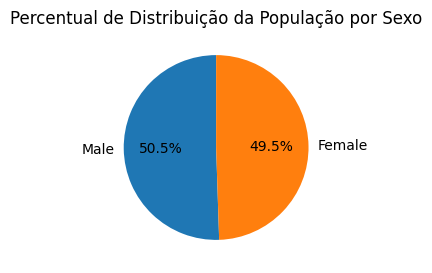

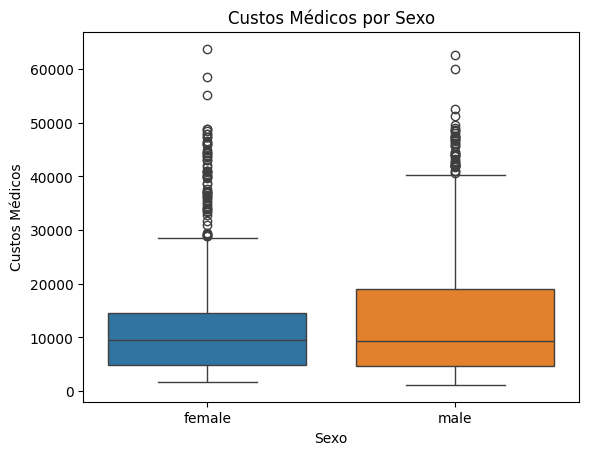

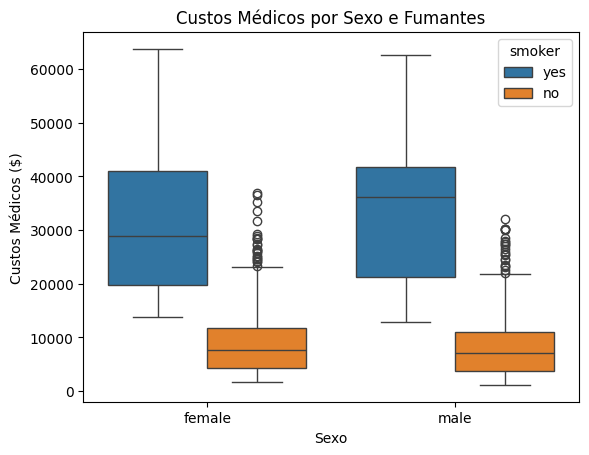

In [91]:
# Distribuição da qunatidade de male vs. female
sex_counts = data['sex'].value_counts()
print(f"Distribuição da População por sexo\n {sex_counts}")

labels_sex = [label.title() for label in sex_counts.index]
plt.figure(figsize=(3,3))
plt.pie(sex_counts, labels=labels_sex, autopct='%1.1f%%', startangle=90)
plt.title("Percentual de Distribuição da População por Sexo")
plt.show()

# Custo Médio por Sexo
sns.boxplot(x='sex', y='charges', data=data, hue="sex")
plt.title('Custos Médicos por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Custos Médicos')
plt.show()

# Custo Médio por Sexo se inserir Fumante ou não
sns.boxplot(data=data, x="sex", y="charges", hue="smoker")
plt.title("Custos Médicos por Sexo e Fumantes")
plt.xlabel("Sexo")
plt.ylabel("Custos Médicos ($)")
plt.show()

**Pergunta 04:** O IMC, campo BMI nos dados, influencia os custos?

**Gráfico:** Scatterplot das colunas bmi vs. charges, com distinção por fumantes.

**Comentário:** Há uma correlação entre IMC e custos médicos, especialmente para os casos de fumantes. Assim podemos verificar que fumantes com IMC elevado tendem a ter custos médicos mais altos, enquanto não fumantes apresentam uma relação mais dispersa. Podemos inferir que as duas variáveis juntas tem alto impacto nos custos, logo iremos utilizar as duas no modelo.

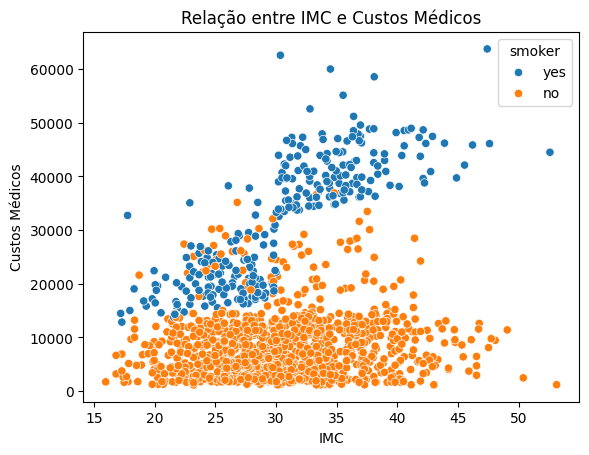

In [76]:
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=data)
plt.title('Relação entre IMC e Custos Médicos')
plt.xlabel('IMC')
plt.ylabel('Custos Médicos')
plt.show()

**Pergunta 05:** Qual a relação entre os custos com a idade?

**Gráfico:** Lineplot das colunas age vs. charges

**Comentário:** Os custos médicos aumentam com a idade, indicando que pessoas mais velhas tendem a ter despesas médicas mais altas. Isso pode estar relacionado ao aumento de problemas de saúde com o envelhecimento, sendo assim a idade é uma das variáveis que vamos utilizar no nosso modelo.

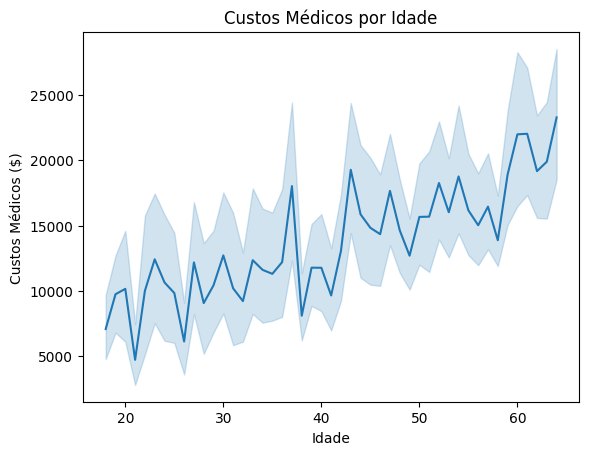

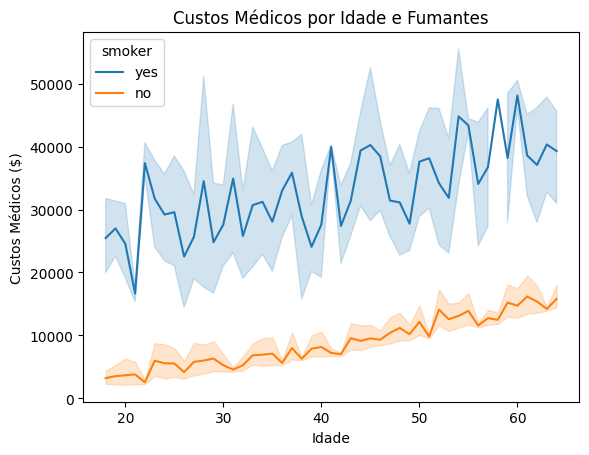

In [77]:
sns.lineplot(data=data, x="age", y="charges")
plt.title("Custos Médicos por Idade")
plt.xlabel("Idade")
plt.ylabel("Custos Médicos ($)")
plt.show()

sns.lineplot(data=data, x="age", y="charges", hue="smoker")
plt.title("Custos Médicos por Idade e Fumantes")
plt.xlabel("Idade")
plt.ylabel("Custos Médicos ($)")
plt.show()

**Pergunta 06:** Ter ou não filhos influencia em algo? 

**Gráfico:** Barplot das colunas children vs. charges

**Comentário:** O número de filhos não parece ter uma influência clara nos custos médicos. As médias são bastante próximas, independentemente do número de filhos, exceto a parte dos 5 filhos. Essa possivelmente não é uma variavel que influencia o modelo.
o lineplot usado na idade não deu uma visualização muito boa para nós, então trocamos aqui para barras.

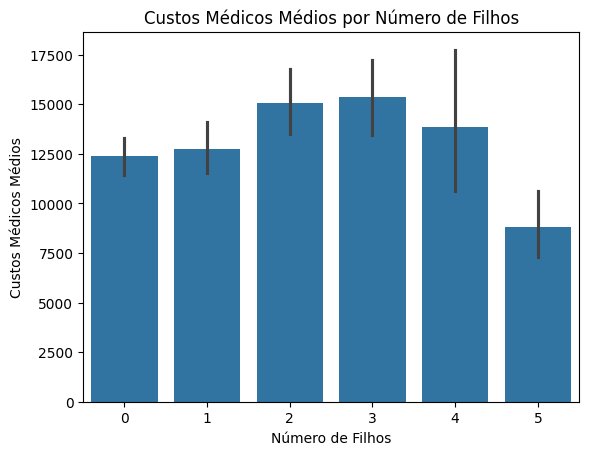

In [78]:
sns.barplot(x='children', y='charges', data=data)
plt.title('Custos Médicos Médios por Número de Filhos')
plt.xlabel('Número de Filhos')
plt.ylabel('Custos Médicos Médios')
plt.show()

**Distribuição dos Custos Médicos**

**Gráfico:** Histograma de charges.

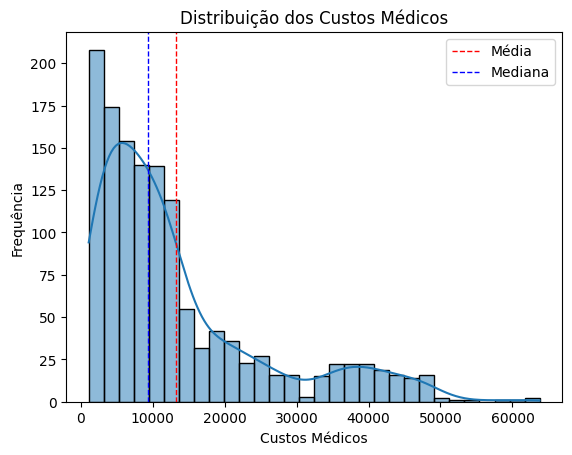

In [79]:
sns.histplot(data['charges'], kde=True, bins=30)
plt.title('Distribuição dos Custos Médicos')
plt.xlabel('Custos Médicos')
plt.ylabel('Frequência')
plt.axvline(data['charges'].mean(), color='red', linestyle='dashed', linewidth=1, label='Média')
plt.axvline(data['charges'].median(), color='blue', linestyle='dashed', linewidth=1, label='Mediana')
plt.legend()
plt.show()

No gráfico de barras (histograma), cada barra representa o numero de pessoas que gastaram uma certa faixa de valores. Por exemplo, uma barra pode mostrar quantas pessoas gastaram entre R$ 1.000 e R$ 2.000, outra entre R$ 2.000 e R$ 3.000, e assim por diante. Isso é chamado de frequência — o número de pessoas em cada faixa de custo.

Conforme vimos nesse gráfico, a maioria das pessoas está nas barras mais à esquerda, ou seja, gastaram valores mais baixos. Isso significa que a maior parte das pessoas tem custos médicos menores.

A cauda longa aparece porque, mesmo que a maioria das pessoas gaste pouco, ainda existem algumas pessoas que gastam valores muito altos, à direita no gráfico. Isso pode acontecer, por exemplo, porque elas têm problemas de saúde mais graves ou condições que exigem tratamentos caros.


**Conclusão:** A distribuição dos custos médicos é assimétrica à direita, com a maioria dos valores concentrados em faixas mais baixas. Há uma cauda longa indicando que algumas pessoas têm custos médicos muito altos, possivelmente devido a condições de saúde graves. Conforme vimos nos gráficos anteriores podemos supor que as variáveis aptas ao modelo são **smoker** (Fumante), **age** (Idade) e **bmi** (IMC), onde apresentam um impacto maior nos custos podendo elevá-los e essas podem ser as variaveis que impactam nessa cauda.


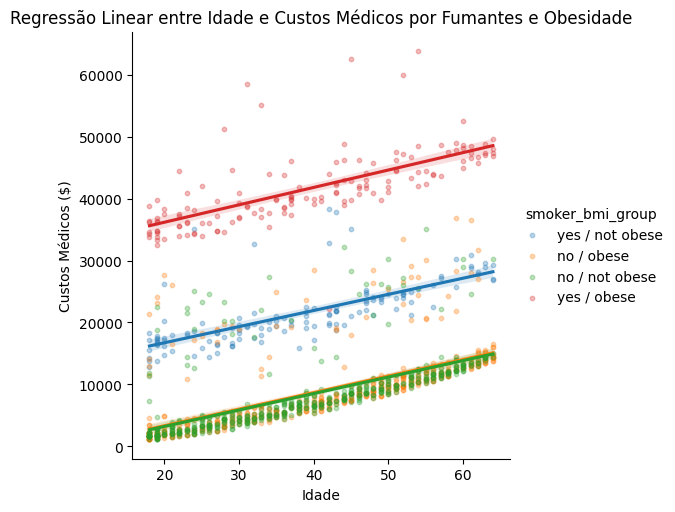

In [80]:
data['bmi_obesidade'] = data['bmi'] >= 30
# IMC entre 25,0 e 29,9 Kg/m2: sobrepeso; 
# IMC entre 30,0 e 34,9 Kg/m2: obesidade grau I; 
# IMC entre 35,0 e 39,9 Kg/m2: obesidade grau II; 
# IMC maior do que 40,0 Kg/m2: obesidade grau III.

data['bmi_obesidade_label'] = data['bmi_obesidade'].replace({True: "obese", False: 'not obese'})
data['smoker_bmi_group'] = data['smoker'] + ' / ' + data['bmi_obesidade_label']

sns.lmplot(data=data, x="age", y="charges", hue='smoker_bmi_group', 
           scatter_kws = {"s": 10, "alpha": 0.3}) 
plt.title("Regressão Linear entre Idade e Custos Médicos por Fumantes e Obesidade")
plt.xlabel("Idade")
plt.ylabel("Custos Médicos ($)") 
plt.show()

Ou seja, pessoas obesas tem um forte impacto nos custos, mas principalmente se for fumante.

## Pré-processamento de Dados

Nessa etapa nós iremos realizar um processamento dos dados para que eles possam ser colocados no modelo preditivo.
Conforme vimos na visualiação de dados, temos o seguinte:
* Como não existem valores nulos, não precisaremos realizar preenchimento dos mesmos, o que no caso poderia ser com a mediana dos valores.
* Temos colunas categóricas que precisam ser processadas para entrar no modelo. São elas: **sex**, **smoker** e **region**. Utilizaremos um **One-Hot Encoding**.
* Vamos remover os outliers possiveis dos dados para evitar discrepancias enormes.
* A Variavel dependente a ser prevista é a coluna **charges**.
* As colunas com maior potencial de alteração no modelo são: **smoker**, **age** e **bmi**.

### Transformação dos Dados Categoricos

Na construção de modelos de machine learning, não podemos utilizar as colunas categoricas como elas estão, em forma de texto. Precisamos transforma-las em números.
Não podemos colocar qualquer número, por isso precisamos criar novas colunas a partir das categoricas e para cada uma, a nova coluna tera um valor correspondente a 1 ou 0 para indicar a presença da caracteristica. Isso é o que chamamos de One Hot Encoding.

No exemplo desses dados, a coluna smoker, apresenta dois dados possiveis:

In [81]:
print(data['smoker'].value_counts())

smoker
no     1064
yes     274
Name: count, dtype: int64


Pelo One Hot Encoding, iremos construir duas novas colunas: smoker_yes e smoker_no.
onde smoker_yes recebe 1 para quem é fumante e 0 para quem não tem a caracteristica. O contrario para a coluna smoker_no.
Faremos isso para todos os dados categoricos do conjunto.

In [82]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_columns = ['sex', 'smoker', 'region']

# Criando um pre-processar para transformar as variáveis categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns) # categorical features
])

# Aplicar a transformação das categorias e nivelamento dos dados
base_transformed = preprocessor.fit_transform(data)
base_transformed_df = pd.DataFrame(base_transformed, columns=preprocessor.get_feature_names_out())
data_encoded = pd.concat([data.drop(columns=categorical_columns), base_transformed_df], axis=1)
data_encoded.head()

,age,bmi,children,charges,bmi_obesidade,bmi_obesidade_label,smoker_bmi_group,cat__sex_female,cat__sex_male,cat__smoker_no,cat__smoker_yes,cat__region_northeast,cat__region_northwest,cat__region_southeast,cat__region_southwest
0,19,27.900,0,16884.92400,False,not obese,yes / not obese,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,True,obese,no / obese,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,True,obese,no / obese,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,False,not obese,no / not obese,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,False,not obese,no / not obese,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


### Remoção de Outliers

Outlier é um item que se desvia significativamente do restante dos itens. Identificar outliers é importante em estatística e análise de dados, pois eles podem ter um impacto significativo nos resultados de análises estatísticas, distorcendo estatisticas.
Eles podem ser causados por erros de medição, amostragem, erros experimentais ou ate mesmo amostragens de multiplas populações.


Maior valor de charges: 63770.42801
Menor valor de charges: 1121.8739


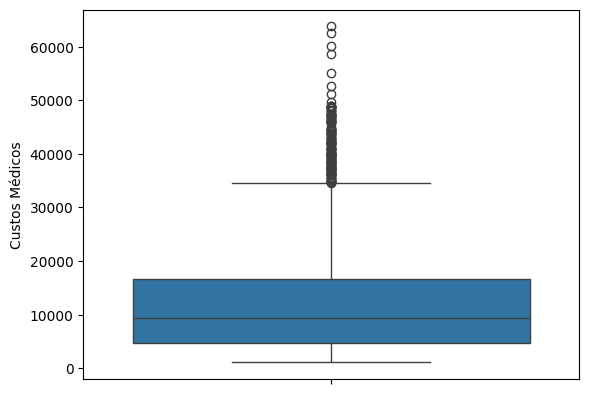

In [83]:
max_charge = data_encoded['charges'].max()
min_charge = data_encoded['charges'].min()

print(f"Maior valor de charges: {max_charge}")
print(f"Menor valor de charges: {min_charge}")

sns.boxplot(data_encoded['charges'])
plt.ylabel('Custos Médicos')
plt.show()


Nós temos dois metodos de remoção:

O IQR (Interquartile Range), ou intervalo interquartil, é uma técnica estatística usada para identificar e remover outliers (valores extremos) em um conjunto de dados. Ele é baseado nos quartis, que dividem os dados em quatro partes iguais.

Ele é robusto contra valores extremos, pois se baseia nos quartis e não na média.
Ajuda a limpar os dados, removendo valores que podem distorcer análises ou modelos preditivos.


In [84]:
import numpy as np

Q1, Q3 = np.percentile(data_encoded['charges'], [25, 75])
print(f"Q1: {Q1}") # separa os 25% menores valores do conjunto de dados.
print(f"Q3: {Q3}") # separa os 25% maiores valores do conjunto de dados.

IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
print(f"Limite Inferior: {lower_bound}")
print(f"Limite Superior: {upper_bound}")

data_no_outliers = data_encoded[(data_encoded['charges'] >= lower_bound) & (data_encoded['charges'] <= upper_bound)]
data_no_outliers.head()

Q1: 4740.28715
Q3: 16639.912515
Limite Inferior: -13109.1508975
Limite Superior: 34489.350562499996


,age,bmi,children,charges,bmi_obesidade,bmi_obesidade_label,smoker_bmi_group,cat__sex_female,cat__sex_male,cat__smoker_no,cat__smoker_yes,cat__region_northeast,cat__region_northwest,cat__region_southeast,cat__region_southwest
0,19,27.900,0,16884.92400,False,not obese,yes / not obese,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,True,obese,no / obese,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,True,obese,no / obese,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,False,not obese,no / not obese,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,False,not obese,no / not obese,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


Maior valor de charges: 34472.841
Menor valor de charges: 1121.8739
Original DataFrame Shape: (1338, 10)
DataFrame Shape after Removing Outliers: (1199, 15)


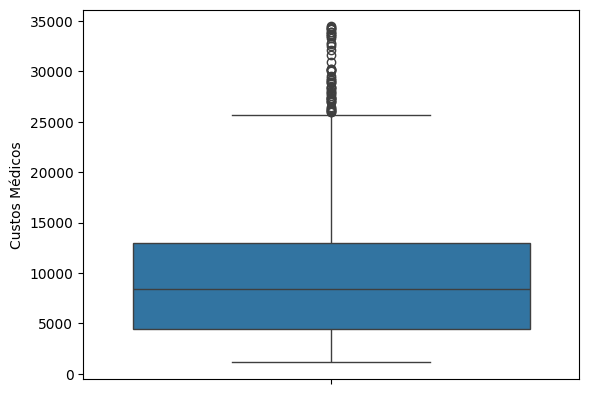

In [85]:
max_charge = data_no_outliers['charges'].max()
min_charge = data_no_outliers['charges'].min()

print(f"Maior valor de charges: {max_charge}")
print(f"Menor valor de charges: {min_charge}")

print("Original DataFrame Shape:", data.shape)
print("DataFrame Shape after Removing Outliers:", data_no_outliers.shape)

sns.boxplot(data_no_outliers['charges'])
plt.ylabel('Custos Médicos')
plt.show()

Maior valor de bmi: 53.13
Menor valor de bmi: 15.96


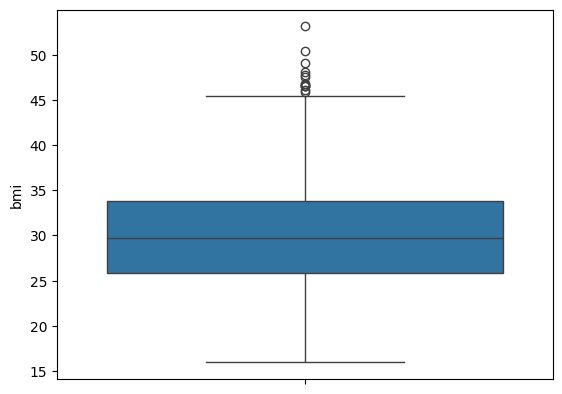

Q1: 25.8
Q3: 33.82
Limite Inferior: 13.770000000000001
Limite Superior: 45.85
Maior valor de bmi: 53.13
Menor valor de bmi: 15.96


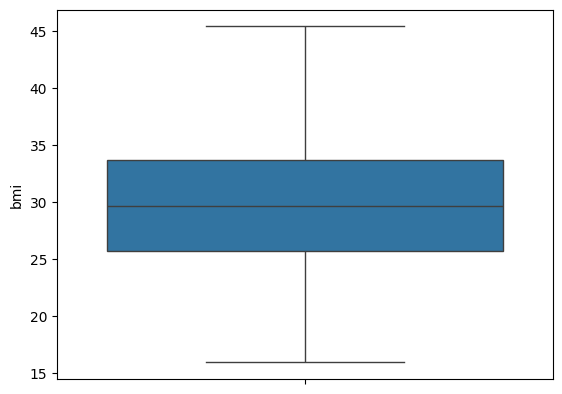

Original DataFrame Shape: (1338, 10)
DataFrame Shape after Removing Outliers: (1186, 15)
Maior valor de age: 64
Menor valor de age: 18


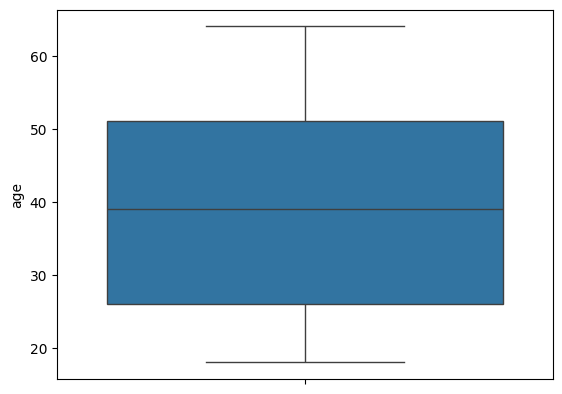

Q1: 26.0
Q3: 51.0
Limite Inferior: -11.5
Limite Superior: 88.5
Maior valor de age: 64
Menor valor de age: 18


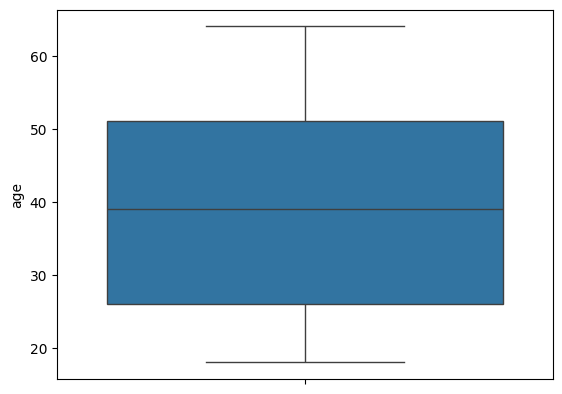

Original DataFrame Shape: (1338, 10)
DataFrame Shape after Removing Outliers: (1186, 15)


,age,bmi,children,charges,bmi_obesidade,bmi_obesidade_label,smoker_bmi_group,cat__sex_female,cat__sex_male,cat__smoker_no,cat__smoker_yes,cat__region_northeast,cat__region_northwest,cat__region_southeast,cat__region_southwest
0,19,27.900,0,16884.92400,False,not obese,yes / not obese,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,True,obese,no / obese,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,True,obese,no / obese,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,False,not obese,no / not obese,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,False,not obese,no / not obese,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [86]:
for column in ['bmi', 'age']:
    max_charge = data_no_outliers[column].max()
    min_charge = data_no_outliers[column].min()
    print(f"Maior valor de {column}: {max_charge}")
    print(f"Menor valor de {column}: {min_charge}")
    sns.boxplot(data_no_outliers[column])
    plt.ylabel(column)
    plt.show()

    Q1, Q3 = np.percentile(data_no_outliers[column], [25, 75])
    print(f"Q1: {Q1}") # separa os 25% menores valores do conjunto de dados.
    print(f"Q3: {Q3}") # separa os 25% maiores valores do conjunto de dados.

    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    print(f"Limite Inferior: {lower_bound}")
    print(f"Limite Superior: {upper_bound}")

    data_no_outliers = data_no_outliers[(data_no_outliers[column] >= lower_bound) & (data_no_outliers[column] <= upper_bound)]

    print(f"Maior valor de {column}: {max_charge}")
    print(f"Menor valor de {column}: {min_charge}")

    sns.boxplot(data_no_outliers[column])
    plt.ylabel(column)
    plt.show()
    
    print("Original DataFrame Shape:", data.shape)
    print("DataFrame Shape after Removing Outliers:", data_no_outliers.shape)

data_no_outliers.head()

O Z-Score é uma métrica estatística que mede o quão distante um valor está da média em termos de desvios padrão.
Para cada valor no conjunto de dados, o Z-Score é calculado como:  

(valor do dado - média do conjunto de dados) / desvio padrão do conjunto de dados.

* Um Z-Score de 0 significa que o valor está exatamente na média.
* Valores positivos indicam que o dado está acima da média, enquanto valores negativos indicam que está abaixo.
* Quanto maior (ou menor) o Z-Score, mais distante o valor está da média.
* Valores com Z-Scores muito altos ou muito baixos (geralmente acima de 3 ou abaixo de -3) são considerados outliers, pois estão muito distantes da média.

Ele é útil para detectar outliers em dados que seguem uma distribuição aproximadamente normal.
É uma abordagem simples e eficaz para identificar valores extremos em relação à média e ao desvio padrão.

In [87]:
from scipy.stats import zscore

data_encoded['z_score'] = zscore(data_encoded['charges']) # Calcular o Z-Score para a coluna 'charges'

# Filtrar os dados para manter apenas os valores com Z-Score entre -3 e 3
data_no_outliers_z = data_encoded[(data_encoded['z_score'] > -3) & (data_encoded['z_score'] < 3)]
data_no_outliers_z = data_no_outliers_z.drop(columns=['z_score'])
data_no_outliers_z.head()

,age,bmi,children,charges,bmi_obesidade,bmi_obesidade_label,smoker_bmi_group,cat__sex_female,cat__sex_male,cat__smoker_no,cat__smoker_yes,cat__region_northeast,cat__region_northwest,cat__region_southeast,cat__region_southwest
0,19,27.900,0,16884.92400,False,not obese,yes / not obese,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,True,obese,no / obese,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,True,obese,no / obese,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,False,not obese,no / not obese,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,False,not obese,no / not obese,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


Maior valor de charges: 49577.6624
Menor valor de charges: 1121.8739
Original DataFrame Shape: (1338, 10)
DataFrame Shape after Removing Outliers: (1331, 15)


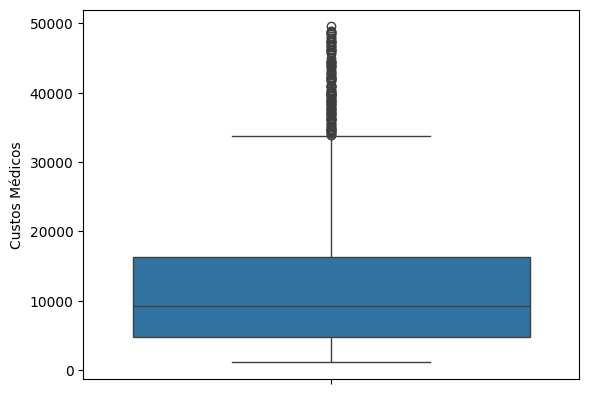

In [88]:
max_charge = data_no_outliers_z['charges'].max()
min_charge = data_no_outliers_z['charges'].min()

print(f"Maior valor de charges: {max_charge}")
print(f"Menor valor de charges: {min_charge}")

print("Original DataFrame Shape:", data.shape)
print("DataFrame Shape after Removing Outliers:", data_no_outliers_z.shape)

sns.boxplot(data_no_outliers_z['charges'])
plt.ylabel('Custos Médicos')
plt.show()

### Matriz de Correlação

A matriz de correlação é uma tabela que mostra as correlações entre diferentes variáveis em um conjunto de dados. A correlação mede a força e a direção do relacionamento linear entre duas variáveis.

Valores de correlação variam de -1 a 1.
* 1: Correlação positiva perfeita (quando uma variável aumenta, a outra também aumenta).
* -1: Correlação negativa perfeita (quando uma variável aumenta, a outra diminui).
* 0: Nenhuma correlação (as variáveis não têm relação linear).

Correlação próxima de 1 ou -1 indica uma relação forte.

Correlação próxima de 0 indica uma relação fraca ou inexistente.

In [89]:
# Matriz de correlação
correlation_matrix = data_no_outliers.corr()

# Visualizar a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

ValueError: could not convert string to float: 'not obese'

* **smoker_yes** tem correlação positiva e negativa com **charges**. Isso indica que ser fumante é o principal fator que aumenta os custos médicos.
* **age** também tem uma correlação positiva significativa, sugerindo que a idade é outro fator importante.
* **bmi** tem uma correlação mais fraca, mas ainda pode ser relevante.
* **children** e **region_northwest** têm uma correlação moderada.